<a href="https://colab.research.google.com/github/mushiboy/Deep-Learning-FastAI-/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Updating fastai

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Importing pathlib

In [0]:
from pathlib import Path

Installing Kaggle

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mushiboy","key":"7dd3e678ce1b62c7e5ac4ed7156e6844"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json



In [0]:
!kaggle datasets download -d puneet6060/intel-image-classification -p /content/gdrive/My\ Drive/fastai-v3/data/intel

 97% 337M/346M [00:07<00:00, 47.3MB/s]
100% 346M/346M [00:07<00:00, 46.9MB/s]


In [0]:
path = Path()

## **IMAGE CLASSIFICATION**

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.


In [0]:
#Image path
image_path = Path("/content/gdrive/My Drive/fastai-v3/data/intel")

Importing Images as Data Variable from Folders

In [0]:
image_path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/intel/seg_test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/intel/seg_pred'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/intel/seg_train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/intel/intel-image-classification.zip')]

In [0]:
data = ImageDataBunch.from_folder(image_path, train = "seg_train", valid = "seg_test", test = "seg_pred", size = 224, ds_tfms = get_transforms(), bs = 64)
data.normalize()

ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glacier,glacier,glacier,glacier,glacier
Path: /content/gdrive/My Drive/fastai-v3/data/intel;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glacier,glacier,glacier,glacier,glacier
Path: /content/gdrive/My Drive/fastai-v3/data/intel;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/data/intel

In [0]:
data.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

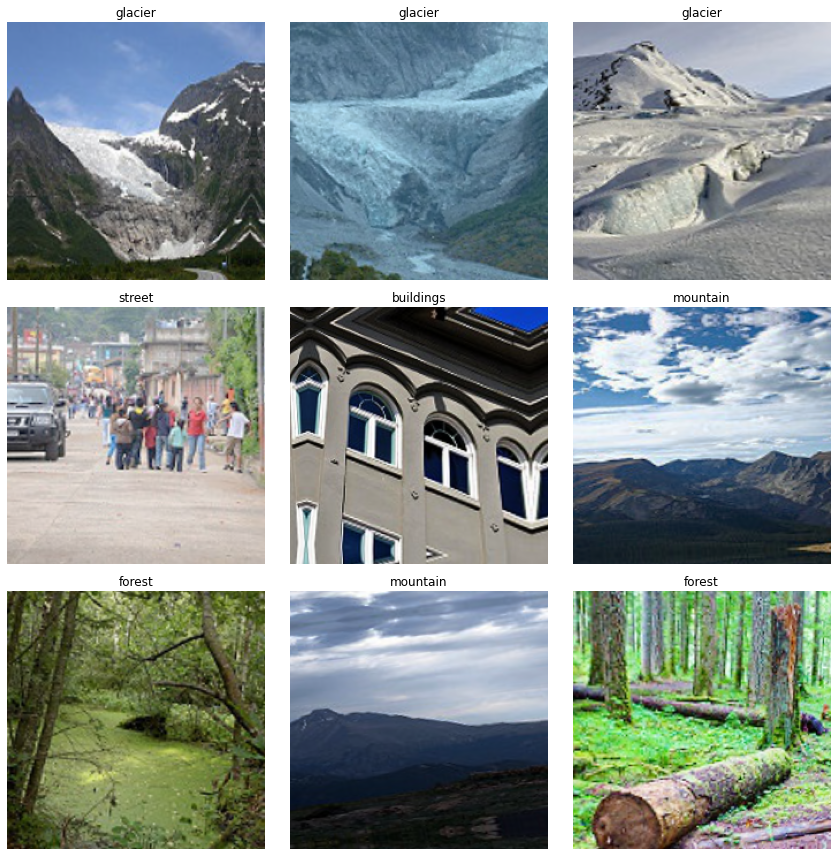

In [0]:
data.show_batch(3, fig_size = (7,6))

### **Training RESNET34**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.429633,0.269042,0.093333,01:52


In [0]:
learn.save("Learn-1")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

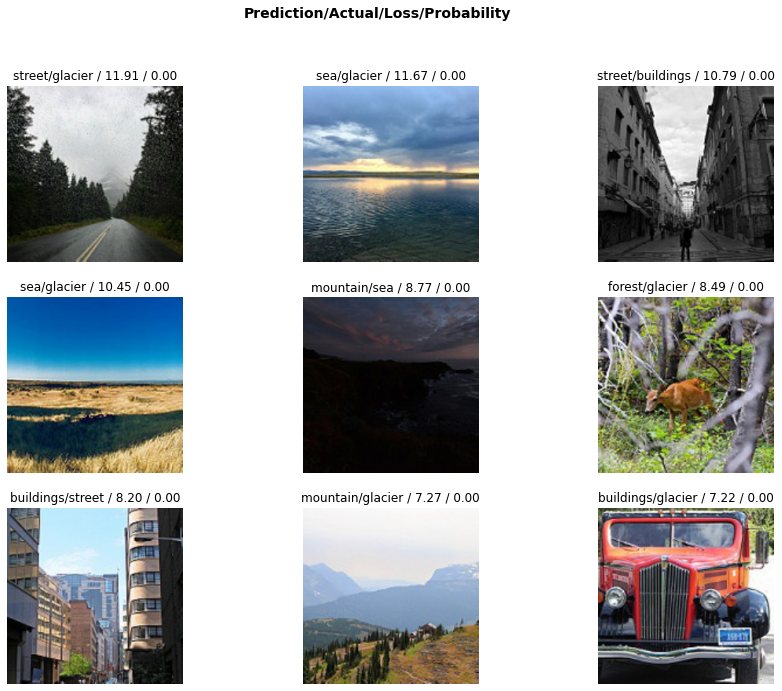

In [0]:
interp.plot_top_losses(9, figsize=(15,11))


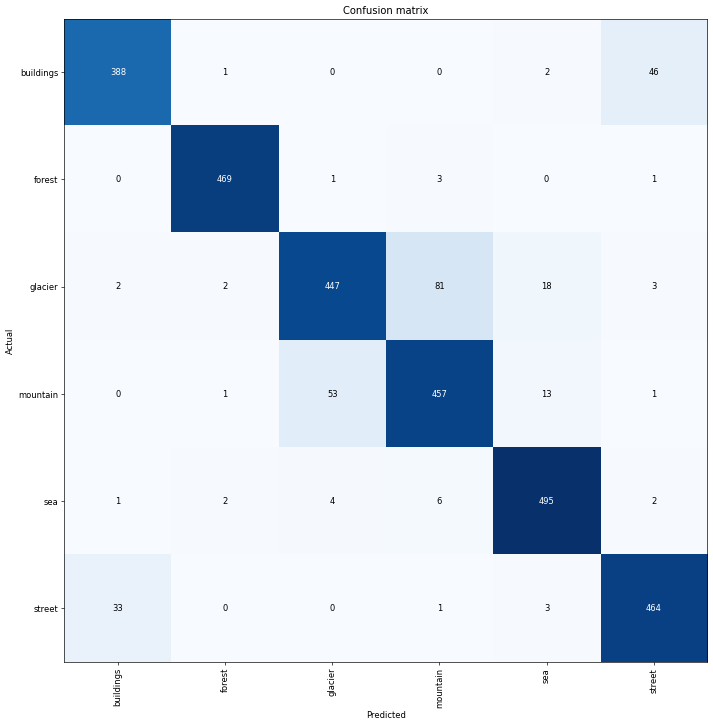

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.281696,0.191811,0.072000,02:02


In [0]:
learn.load("Learn-1")

Learner(data=ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glacier,glacier,glacier,glacier,glacier
Path: /content/gdrive/My Drive/fastai-v3/data/intel;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glacier,glacier,glacier,glacier,glacier
Path: /content/gdrive/My Drive/fastai-v3/data/intel;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/data/intel, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


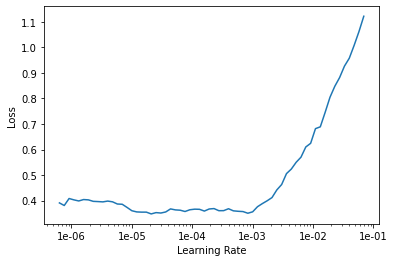

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.298314,0.210202,0.076333,02:01
1,0.177917,0.181856,0.065667,02:00
